In [1]:
# PythonによるRidge回帰・ Lasso回帰


In [41]:
# linear_modelやsklearnなどをインポート
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import linear_model

%precision 3
%matplotlib inline


In [42]:
# データの読み込み（サイズが１５０で、X_1~X_100まで１００列あります。）
X = pd.read_csv('../statistics_python/7-3-1-large-data.csv')
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


In [43]:
# 標準化

# 標準化は各々の変数から平均値を引いて標準偏差で割るのでした。
# こうすることで平均０、標準偏差１になります。まずはX_1に関すて平均値を計算します。
sp.mean(X.X_1)

0.037

In [44]:
# しかし全ての説明変数に適用するのは大変です。
# axis = 0 と指定すると列単位で平均値を一気に取得してくれます。

sp.mean(X, axis = 0).head(3)

X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [45]:
# これを使えば簡単に標準化ができます。

X -= sp.mean(X, axis = 0 )
X /= sp.std(X, ddof = 1, axis = 0)

In [46]:
# 平均値が０になったことを確認します。
sp.mean(X, axis = 0).head(3).round(3)

X_1    0.0
X_2   -0.0
X_3   -0.0
dtype: float64

In [47]:
# 標準偏差も１になりました。
sp.std(X, ddof = 1, axis = 0).head(3)

X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

In [48]:
# シミュレーションで応答変数を作る

# 読み込んだデータには応答変数がありまでんでした。これを今から作ります。
# 正しい係数がわかっている状況で、それをちゃんと推定できるかチェックするわけです。

# 正しい係数は５であることとして応答変数を作ります。正規分布に従うノイズが入っていることにします。

# 正規分布に従うノイズ
np.random.seed(1)
noise = sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

# 正しい係数は５として応答変数を作る
y = X.X_1 * 5 + noise

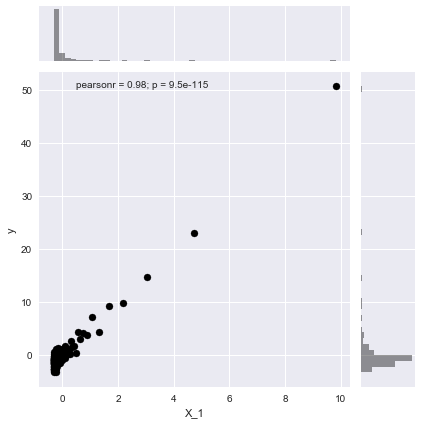

In [49]:
# 応答変数とX_1の関係を図示してみます
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis = 1)

# 散布図の作成
sns.jointplot(y = "y", x = "X_1", data = large_data, color = 'black')

In [50]:
# 説明変数は仮装データで、０に近いデータがほとんどを占めます。そんな中たまに大きな値が出ます。


In [51]:
# 普通の最小二乗法を適用する
lm_statsmodels = sm.OLS(endog = y, exog = X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

In [52]:
# この結果を見ると、かなりおかしな値が推定されてしまっていることがわかります.

In [53]:
# === sklearnによる線形回帰 ===

# 正則化の用いたモデルに移る前に、scikit-learnの使い方に慣れる目的でsklearnを使って通常の最小二乗法を用いた正規線形モデルを推定してみます。

# どんなモデルを作るかをまずは指定
lm_sklearn = linear_model.LinearRegression()

# データを指定して、モデルを推定
lm_sklearn.fit(X, y)

# 指定されたパラメタ(array型)
lm_sklearn.coef_

array([  1.476e+01,  -8.746e+01,   2.117e+02,  -9.415e+01,  -6.817e+01,
        -9.284e+01,   1.761e+00,   8.170e+01,   6.680e+01,   2.788e+01,
        -3.288e+01,   6.818e+01,  -1.699e+01,   2.208e+01,  -4.855e+01,
        -3.390e+01,  -4.536e+01,   9.728e+00,   2.481e+01,   1.858e+00,
         1.599e+00,  -2.838e+01,   6.477e+00,  -5.980e+01,   3.532e+01,
        -1.302e+01,   4.108e+01,  -4.303e+01,   5.247e+01,   1.920e+00,
         3.342e+01,   8.490e+00,   8.329e+00,  -2.293e+01,  -3.577e+01,
        -1.337e+01,   3.178e+01,  -2.018e+01,  -2.654e+01,  -3.523e+01,
         1.927e+01,   4.823e+01,  -1.655e+00,   5.749e-01,  -1.893e+01,
         7.370e-01,   1.047e+01,  -7.732e+00,  -1.854e+00,  -2.559e-01,
        -5.045e+00,  -4.227e+00,   2.523e+01,   1.616e+01,  -1.310e+01,
         6.455e+00,  -1.332e+01,  -2.291e+01,  -1.202e+01,   7.745e+00,
         1.755e+01,   5.997e+00,   4.648e+00,   4.120e+00,  -1.825e+00,
         5.366e+00,   4.546e+00,  -2.598e+00,  -4.091e+00,   7.4

In [54]:
# Ridge回帰　ー　罰則項の影響

# 通常の最小二乗法ではうまくいかないことがわかったので正則化を使います。
# 正則化において重要なのは正則化の強度 α の決定です。正則化の強度αがもたらす影響を調べるところから進めていきます
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [55]:
# np.logspace はnp.arangeと似たようなもので、底を１０とした対数を取ると等差数列になります。
sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [56]:
# αを50通り変えながら、５０回Ridge回帰を推定します。

# 指定された回帰係数を格納するリスト
ridge_coefs = []

# forループで何度もRidge回帰を推定する
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False) #(第二引数：　切片を推定しない)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [57]:
# 推定された係数をnumpyアレイに変換します。
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

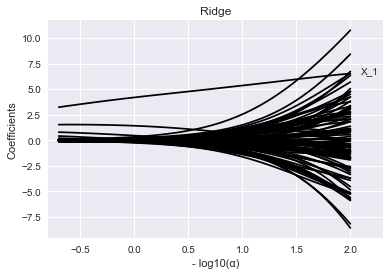

In [58]:
# 結果を見やすくするために、横軸を-log１０(α)に変換した上でプロットします。
# このようなグラフをsolution_pathと言います。

# αを変換
log_alphas = -sp.log10(ridge_alphas)

# 横軸に-log10(α)、縦軸に係数をおいた折れ線グラフ
plt.plot(log_alphas, ridge_coefs, color = 'black')

# 説明変数X_1の係数がわかるように目印を入れる
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")

# x軸の範囲
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

# 軸ラベル
plt.title("Ridge")
plt.xlabel("- log10(α)")
plt.ylabel("Coefficients")

In [59]:
# Ridge回帰 - 最適な正則化の強度の決定 -

# αの大きさを決める作業に移ります。クロスバリデーション法を用いて予測精度を評価し、精度がもっとも良くなったαを採用し、モデルを再構築します

# CVで最適なαを求める
ridge_best = linear_model.RidgeCV(cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y)

# 最適な - log10(α)
- sp.log10(ridge_best.alpha_)

0.237

In [60]:
# - log10(α) = 0.237 の地点を先ほどのsokution-pathで見ると、X_1以外の説明変数の係数の絶対値が０に近くなっていることがわかります。

# 最適なαは以下の通りです
ridge_best.alpha_

0.580

In [61]:
# 指定された係数の一覧は以下の通りです。
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

In [62]:
# === Lasso回帰 - 罰則項の影響 - ===

# 続いてLasso回帰に移ります。
# lasso_pathという便利な関数があるのでそれを使います。引数にデータを指定するだけで、αを様々に変えた結果を出力してくれます。

lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X, y, fit_intercept = False)

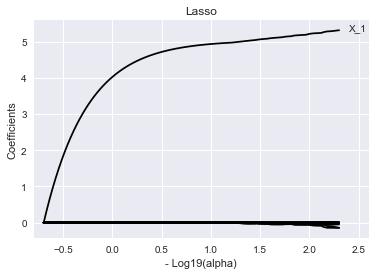

In [70]:
# Ridge回帰と同様にsolution-pathを描きます。
# lasso_coefsの並び順がRidge回帰の時と異なるので行列を転置させたりします。

# α を変換
log_alphas = - sp.log10(lasso_alphas)

# 横軸に-log10(α),横に係数を置いた折れ線グラス
plt.plot(log_alphas, lasso_coefs.T, color = "black")


# 説明変数X_1の係数がわsssssssssかるように目印を置く
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")

# X軸の範囲
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3] )

# 軸ラベル
plt.title("Lasso")
plt.xlabel("- Log19(alpha)")
plt.ylabel("Coefficients")

In [71]:
# === Lasso回帰 - 最適な正則化の強度の決定- ===

# クロスバリデーション法を応用してαを決定します。

# CVで最適なαを求める 
lasso_best = linear_model.LassoCV(cv = 10, alphas = lasso_alphas, fit_intercept = False)
lasso_best.fit(X, y)

# 最適な-log(α)
-sp.log10(lasso_best.alpha_)

2.301

In [72]:
# 最適なαは以下の通りです
lasso_best.alpha_

0.005

In [73]:
# 推定された係数の一覧は以下の通りです。ほとんどの係数が０になりました。
# X_1の係数もおよそ５となりましたので、正しくモデル化出来たと見てよいでしょう。
lasso_best.coef_

array([  5.336e+00,  -0.000e+00,  -0.000e+00,  -3.043e-01,  -4.121e-02,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,  -0.000e+00,
        -0.000e+00,  -0.000e+00,  -0.000e+00,   0.000e+00,  -0.000e+00,
         0.000e+00,   0.000e+00,  -0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,  -0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
         0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.0